In [1]:
from importlib import reload
from matplotlib import pyplot as plt
import numpy as np
import src.data
import cascade_failure.simple_cascade
import src.visualization
import src.atack
reload(cascade_failure.simple_cascade)
reload(src.data)
reload(src.visualization)
reload(src.atack)

from src.data import load_data_with_attributes
from src.visualization import draw_graph_after_failure, draw_graph_with_node_highlighted, draw_graph_after_failure_with_attacked_nodes
from cascade_failure.simple_cascade import cascade_failure_equal_load_distribution, cascade_failure_proportional_load_distribution
from src.atack import random_node_attack, high_degree_node_attack, high_load_capacity_ratio_node_attack, high_load_capacity_ratio_and_degree_node_attack, high_load_node_attack

In [2]:
G = load_data_with_attributes()

In [ ]:
def evaluate_attack_strategy(
    G0,
    num_nodes_to_attack,
    attack
):
    num_failed_nodes = [0, 0, 0, 0]

    # --- Non-sequential attacks ---
    for i, cascade_fn in enumerate([
        cascade_failure_proportional_load_distribution,
        cascade_failure_equal_load_distribution,
    ]):
        G = G0.copy()
        attacked_nodes = attack(G, number_of_nodes=num_nodes_to_attack)
        G, _, _, _ = cascade_fn(G, attacked_nodes)

        num_failed_nodes[i] = sum(
            1 for n in G.nodes() if G.nodes[n]["failed"]
        )

    # --- Sequential attacks ---
    for i, cascade_fn in enumerate([
        cascade_failure_proportional_load_distribution,
        cascade_failure_equal_load_distribution
    ], start=2):
        G = G0.copy()
        attacked_nodes = []

        for _ in range(num_nodes_to_attack):
            attacked_node = attack(G, number_of_nodes=1)
            attacked_nodes.extend(attacked_node)
            G, _, _, _ = cascade_fn(G, attacked_node)

        num_failed_nodes[i] = sum(
            1 for n in G.nodes() if G.nodes[n]["failed"]
        )

    return num_failed_nodes


In [ ]:
def hihi_lcr(G0, num_nodes_to_attack):
    return evaluate_attack_strategy(
        G0,
        num_nodes_to_attack,
        attack=high_load_capacity_ratio_node_attack
    )


def hihi_l(G0, num_nodes_to_attack):
    return evaluate_attack_strategy(
        G0,
        num_nodes_to_attack,
        attack=high_load_node_attack
    )

def hihi_l(G0, num_nodes_to_attack):
    return evaluate_attack_strategy(
        G0,
        num_nodes_to_attack,
        attack=high_load_node_attack
    )


In [12]:
fn_1 = hihi_lcr(G, 50)
fn_2 = hihi_l(G, 50)

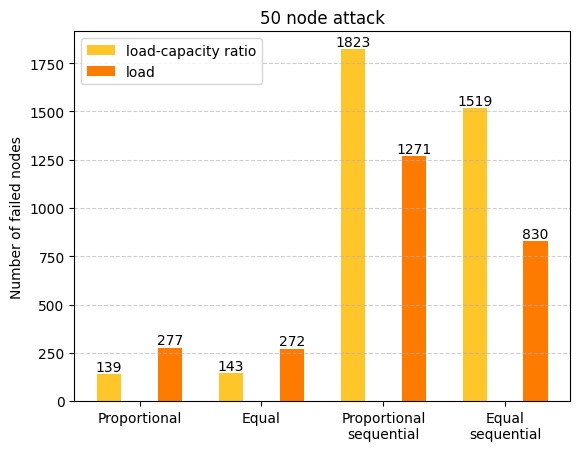

In [13]:
fn = [0, 0, 0, 0, 0, 0, 0, 0]
for i in range(4):
    fn[2*i] = fn_1[i]
    fn[2*i + 1] = fn_2[i]

labels = [
    "Proportional",
    "Equal",
    "Proportional\nsequential",
    "Equal\nsequential"
]

x = np.arange(8) * 1.5

bars1 = plt.bar(x[::2], fn_1, width=0.6, color='#ffc62a', label='load-capacity ratio')
bars2 = plt.bar(x[1::2], fn_2, width=0.6, color='#ff7b00', label='load')

# Compute midpoints of each bar pair
pair_centers = (x[::2] + x[1::2]) / 2

plt.title("50 node attack")
plt.ylabel("Number of failed nodes")
plt.xticks(pair_centers, labels)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper left')

for bar in bars1+bars2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha='center',
        va='bottom'
    )

plt.show()


In [6]:
fn_1 = hihi_lcr(G, 10)
fn_2 = hihi_l(G, 10)

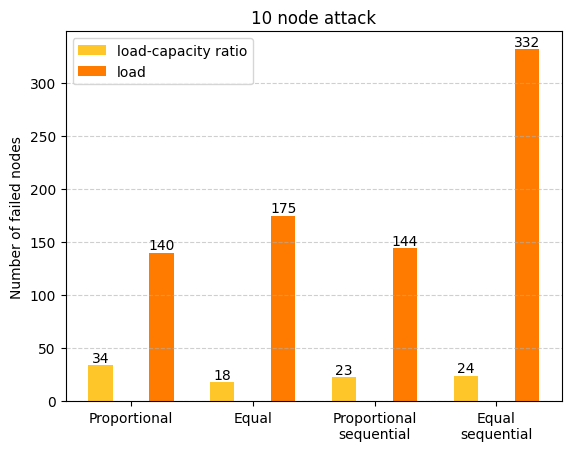

In [7]:
fn = [0, 0, 0, 0, 0, 0, 0, 0]
for i in range(4):
    fn[2*i] = fn_1[i]
    fn[2*i + 1] = fn_2[i]

labels = [
    "Proportional",
    "Equal",
    "Proportional\nsequential",
    "Equal\nsequential"
]

x = np.arange(8) * 1.5

bars1 = plt.bar(x[::2], fn_1, width=0.6, color='#ffc62a', label='load-capacity ratio')
bars2 = plt.bar(x[1::2], fn_2, width=0.6, color='#ff7b00', label='load')

# Compute midpoints of each bar pair
pair_centers = (x[::2] + x[1::2]) / 2

plt.title("10 node attack")
plt.ylabel("Number of failed nodes")
plt.xticks(pair_centers, labels)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper left')

for bar in bars1+bars2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha='center',
        va='bottom'
    )

plt.show()


In [8]:
fn_1 = hihi_lcr(G, 100)
fn_2 = hihi_l(G, 100)

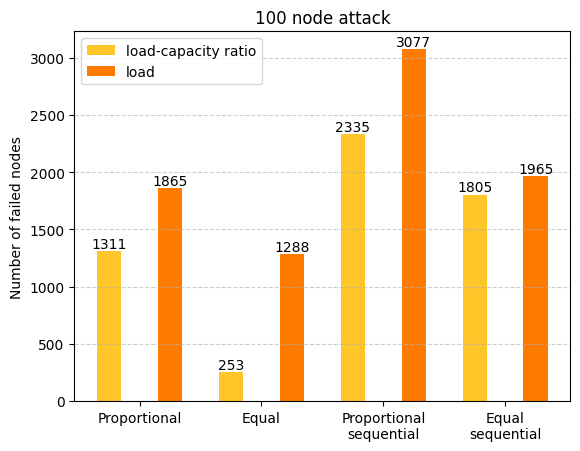

In [9]:
fn = [0, 0, 0, 0, 0, 0, 0, 0]
for i in range(4):
    fn[2*i] = fn_1[i]
    fn[2*i + 1] = fn_2[i]

labels = [
    "Proportional",
    "Equal",
    "Proportional\nsequential",
    "Equal\nsequential"
]

x = np.arange(8) * 1.5

bars1 = plt.bar(x[::2], fn_1, width=0.6, color='#ffc62a', label='load-capacity ratio')
bars2 = plt.bar(x[1::2], fn_2, width=0.6, color='#ff7b00', label='load')

# Compute midpoints of each bar pair
pair_centers = (x[::2] + x[1::2]) / 2

plt.title("100 node attack")
plt.ylabel("Number of failed nodes")
plt.xticks(pair_centers, labels)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper left')

for bar in bars1+bars2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha='center',
        va='bottom'
    )

plt.show()


In [3]:
def hihi_lcr(G0, num_nodes_to_attack):
    num_failed_nodes = [0, 0, 0, 0]

    # Proportional Load Distribution
    G = G0.copy()
    attacked_nodes = high_load_capacity_ratio_node_attack(G, number_of_nodes=num_nodes_to_attack)
    G, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
    # draw_graph_after_failure_with_attacked_nodes(G, attacked_nodes, title="Proportional Load Distribution")
    # print(f"Number of cascade steps: {steps}")
    # print(f"Failed nodes per step: {failed_per_step}")
    # print(f"Final outputs: {outputs}")
    # print("Attacked nodes:", attacked_nodes)
    num_failed = sum(1 for n in G.nodes() if G.nodes[n]["failed"])
    num_failed_nodes[0] = num_failed

    # Equal Load Distribution
    G = G0.copy()
    attacked_nodes = high_load_capacity_ratio_node_attack(G, number_of_nodes=num_nodes_to_attack)
    G, steps, failed_per_step, outputs = cascade_failure_equal_load_distribution(G, attacked_nodes)
    # draw_graph_after_failure_with_attacked_nodes(G, attacked_nodes, title="Equal Load Distribution")
    # print(f"Number of cascade steps: {steps}")
    # print(f"Failed nodes per step: {failed_per_step}")
    # print(f"Final outputs: {outputs}")
    # print("Attacked nodes:", attacked_nodes)
    num_failed = sum(1 for n in G.nodes() if G.nodes[n]["failed"])
    num_failed_nodes[1] = num_failed

    # Proportional Load Distribution sequential 50 node attacks
    G = G0.copy()
    attacked_nodes = []
    for i in range(num_nodes_to_attack):
        attacked_node = high_load_capacity_ratio_node_attack(G, number_of_nodes=1)
        attacked_nodes.extend(attacked_node)
        G, _, _, _ = cascade_failure_proportional_load_distribution(G, attacked_node)

    # draw_graph_after_failure_with_attacked_nodes(G, attacked_nodes, title="Proportional Load Distribution")
    num_failed = sum(1 for n in G.nodes() if G.nodes[n]["failed"])
    # print(f"Total failed nodes after sequential attacks: {num_failed}")
    # print("Attacked nodes:", attacked_nodes)
    num_failed_nodes[2] = num_failed

    G = load_data_with_attributes()

    # Equal Load Distribution sequential 50 node attacks
    G = G0.copy()
    attacked_nodes = []
    for i in range(num_nodes_to_attack):
        attacked_node = high_load_capacity_ratio_node_attack(G, number_of_nodes=1)
        attacked_nodes.extend(attacked_node)
        G, _, _, _ = cascade_failure_equal_load_distribution(G, attacked_node)

    # draw_graph_after_failure_with_attacked_nodes(G, attacked_nodes, title="Equal Load Distribution")
    num_failed = sum(1 for n in G.nodes() if G.nodes[n]["failed"])
    # print(f"Total failed nodes after sequential attacks: {num_failed}")
    # print("Attacked nodes:", attacked_nodes)
    num_failed_nodes[3] = num_failed

    return num_failed_nodes


def hihi_l(G0, num_nodes_to_attack):
    num_failed_nodes = [0, 0, 0, 0]

    # Proportional Load Distribution
    G = G0.copy()
    attacked_nodes = high_load_node_attack(G, number_of_nodes=num_nodes_to_attack)
    G, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
    # draw_graph_after_failure_with_attacked_nodes(G, attacked_nodes, title="Proportional Load Distribution")
    # print(f"Number of cascade steps: {steps}")
    # print(f"Failed nodes per step: {failed_per_step}")
    # print(f"Final outputs: {outputs}")
    # print("Attacked nodes:", attacked_nodes)
    num_failed = sum(1 for n in G.nodes() if G.nodes[n]["failed"])
    num_failed_nodes[0] = num_failed

    # Equal Load Distribution
    G = G0.copy()
    attacked_nodes = high_load_node_attack(G, number_of_nodes=num_nodes_to_attack)
    G, steps, failed_per_step, outputs = cascade_failure_equal_load_distribution(G, attacked_nodes)
    # draw_graph_after_failure_with_attacked_nodes(G, attacked_nodes, title="Equal Load Distribution")
    # print(f"Number of cascade steps: {steps}")
    # print(f"Failed nodes per step: {failed_per_step}")
    # print(f"Final outputs: {outputs}")
    # print("Attacked nodes:", attacked_nodes)
    num_failed = sum(1 for n in G.nodes() if G.nodes[n]["failed"])
    num_failed_nodes[1] = num_failed

    # Proportional Load Distribution sequential 50 node attacks
    G = G0.copy()
    attacked_nodes = []
    for i in range(num_nodes_to_attack):
        attacked_node = high_load_node_attack(G, number_of_nodes=1)
        attacked_nodes.extend(attacked_node)
        G, _, _, _ = cascade_failure_proportional_load_distribution(G, attacked_node)

    # draw_graph_after_failure_with_attacked_nodes(G, attacked_nodes, title="Proportional Load Distribution")
    num_failed = sum(1 for n in G.nodes() if G.nodes[n]["failed"])
    # print(f"Total failed nodes after sequential attacks: {num_failed}")
    # print("Attacked nodes:", attacked_nodes)
    num_failed_nodes[2] = num_failed

    G = load_data_with_attributes()

    # Equal Load Distribution sequential 50 node attacks
    G = G0.copy()
    attacked_nodes = []
    for i in range(num_nodes_to_attack):
        attacked_node = high_load_node_attack(G, number_of_nodes=1)
        attacked_nodes.extend(attacked_node)
        G, _, _, _ = cascade_failure_equal_load_distribution(G, attacked_node)

    # draw_graph_after_failure_with_attacked_nodes(G, attacked_nodes, title="Equal Load Distribution")
    num_failed = sum(1 for n in G.nodes() if G.nodes[n]["failed"])
    # print(f"Total failed nodes after sequential attacks: {num_failed}")
    # print("Attacked nodes:", attacked_nodes)
    num_failed_nodes[3] = num_failed

    return num_failed_nodes